C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


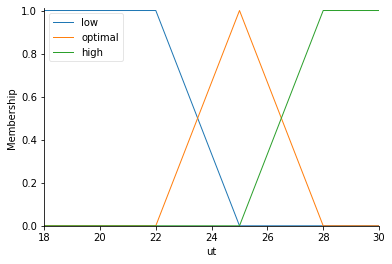

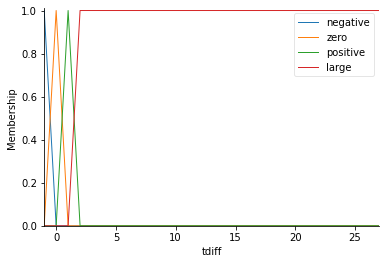

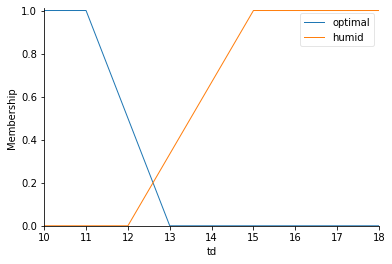

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ut = ctrl.Antecedent(np.arange(18, 31, 1), 'ut')
tdiff= ctrl.Antecedent(np.arange(-1, 28, 1), 'tdiff')
td= ctrl.Antecedent(np.arange(10, 19, 1), 'td')

ut['low'] = fuzz.trapmf(ut.universe, [18, 18, 22, 25])
ut['optimal'] = fuzz.trimf(ut.universe, [22, 25, 28])
ut['high'] = fuzz.trapmf(ut.universe, [25, 28, 30, 30])

ut.view()


tdiff['negative'] = fuzz.trimf(tdiff.universe, [-1, -1, 0])
tdiff['zero'] = fuzz.trimf(tdiff.universe, [-0.5, 0, 0.5])
tdiff['positive'] = fuzz.trimf(tdiff.universe, [0, 1, 2])
tdiff['large'] = fuzz.trapmf(tdiff.universe, [1, 2, 27, 27])


tdiff.view()


td['optimal'] = fuzz.trapmf(td.universe, [10, 10, 11, 13])
td['humid'] = fuzz.trapmf(td.universe, [12, 15, 18, 18])

td.view()




C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig

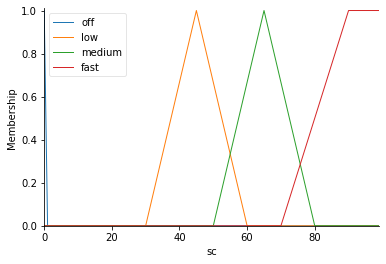

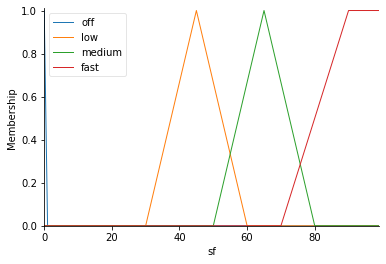

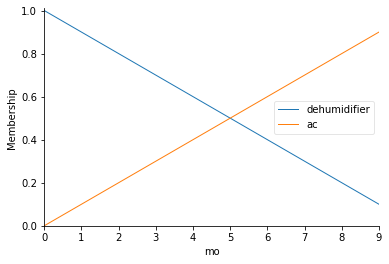

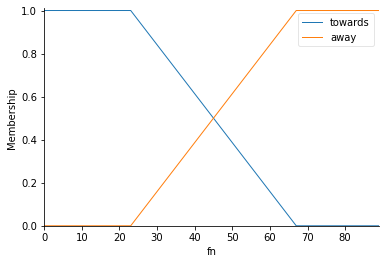

In [9]:
sc=ctrl.Consequent(np.arange(0, 100, 1), 'sc')
sf=ctrl.Consequent(np.arange(0, 100, 1), 'sf')
mo=ctrl.Consequent(np.arange(0, 10, 1), 'mo')
fn=ctrl.Consequent(np.arange(0, 90, 1), 'fn')




sc['off'] = fuzz.trimf(sc.universe, [0, 0, 0])
sc['low'] = fuzz.trimf(sc.universe, [30, 45, 60])
sc['medium'] = fuzz.trimf(sc.universe, [50, 65, 80])
sc['fast'] = fuzz.trapmf(sc.universe, [70, 90, 100,100])

sc.view()

sf['off'] = fuzz.trimf(sf.universe, [0, 0, 0])
sf['low'] = fuzz.trimf(sf.universe, [30, 45, 60])
sf['medium'] = fuzz.trimf(sf.universe, [50, 65, 80])
sf['fast'] = fuzz.trapmf(sf.universe, [70, 90, 100,100])

sf.view()

mo['dehumidifier'] = fuzz.trimf(mo.universe, [0, 0, 10])
mo['ac'] = fuzz.trimf(mo.universe, [0, 10, 10])

mo.view()

fn['towards'] = fuzz.trapmf(fn.universe, [0, 0, 23, 67])
fn['away'] = fuzz.trapmf(fn.universe, [23, 67, 90, 90])

fn.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

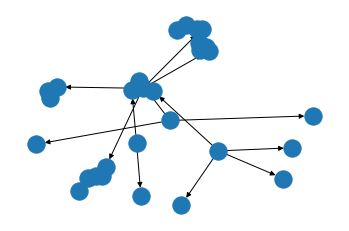

In [10]:
rule1 = ctrl.Rule(td['optimal'] & ut['low'] & tdiff['negative'], [sc['off'],fn['away'],mo['ac'],sf['off']])
rule2 = ctrl.Rule(td['optimal'] & ut['low'] & tdiff['zero'], [sc['off'],fn['towards'],mo['ac'],sf['fast']])
rule3 = ctrl.Rule(td['optimal'] & ut['low'] & tdiff['positive'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])
rule4 = ctrl.Rule(td['optimal'] & ut['low'] & tdiff['large'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])

rule5 = ctrl.Rule(td['optimal'] & ut['optimal'] & tdiff['negative'], [sc['off'],fn['away'],mo['ac'],sf['off']])
rule6 = ctrl.Rule(td['optimal'] & ut['optimal'] & tdiff['zero'], [sc['off'],fn['towards'],mo['ac'],sf['medium']])
rule7 = ctrl.Rule(td['optimal'] & ut['optimal'] & tdiff['positive'], [sc['medium'],fn['towards'],mo['ac'],sf['medium']])
rule8 = ctrl.Rule(td['optimal'] & ut['optimal'] & tdiff['large'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])

rule9 = ctrl.Rule(td['optimal'] & ut['high'] & tdiff['negative'], [sc['off'],fn['away'],mo['ac'],sf['off']])
rule10 = ctrl.Rule(td['optimal'] & ut['high'] & tdiff['zero'], [sc['off'],fn['away'],mo['ac'],sf['low']])
rule11 = ctrl.Rule(td['optimal'] & ut['high'] & tdiff['positive'], [sc['medium'],fn['towards'],mo['ac'],sf['medium']])
rule12 = ctrl.Rule(td['optimal'] & ut['high'] & tdiff['large'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])

# --------------

rule13 = ctrl.Rule(td['humid'] & ut['low'] & tdiff['negative'], [sc['fast'],fn['towards'],mo['dehumidifier'],sf['fast']])
rule14 = ctrl.Rule(td['humid'] & ut['low'] & tdiff['zero'], [sc['fast'],fn['towards'],mo['dehumidifier'],sf['fast']])
rule15 = ctrl.Rule(td['humid'] & ut['low'] & tdiff['positive'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])
rule16 = ctrl.Rule(td['humid'] & ut['low'] & tdiff['large'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])

rule17 = ctrl.Rule(td['humid'] & ut['optimal'] & tdiff['negative'], [sc['low'],fn['away'],mo['dehumidifier'],sf['low']])
rule18 = ctrl.Rule(td['humid'] & ut['optimal'] & tdiff['zero'], [sc['medium'],fn['towards'],mo['dehumidifier'],sf['fast']])
rule19 = ctrl.Rule(td['humid'] & ut['optimal'] & tdiff['positive'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])
rule20 = ctrl.Rule(td['humid'] & ut['optimal'] & tdiff['large'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])

rule21 = ctrl.Rule(td['humid'] & ut['high'] & tdiff['negative'], [sc['low'],fn['away'],mo['dehumidifier'],sf['low']])
rule22 = ctrl.Rule(td['humid'] & ut['high'] & tdiff['zero'], [sc['medium'],fn['towards'],mo['dehumidifier'],sf['medium']])
rule23 = ctrl.Rule(td['humid'] & ut['high'] & tdiff['positive'], [sc['medium'],fn['towards'],mo['ac'],sf['fast']])
rule24 = ctrl.Rule(td['humid'] & ut['high'] & tdiff['large'], [sc['fast'],fn['towards'],mo['ac'],sf['fast']])


rule1.view()

In [11]:
ac_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9
                                ,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19
                                ,rule20,rule21,rule22,rule23,rule24])

In [12]:
ac = ctrl.ControlSystemSimulation(ac_ctrl)

In [13]:
ac.input['td'] = 17         # 10 to 18
ac.input['ut'] = 29         # 18 to 30
ac.input['tdiff'] = 1       # -1 to 27

# Crunch the numbers
ac.compute()

OrderedDict([('sc', 64.99999999999997), ('fn', 24.292592592592584), ('mo', 5.999999999999998), ('sf', 88.62280701754386)])


C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Fares_i9bkpvz\anaconda3\envs\forth\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig

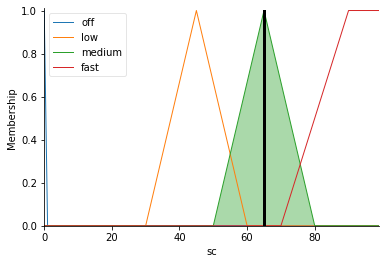

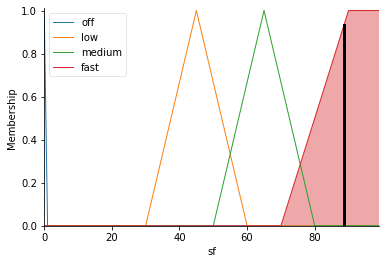

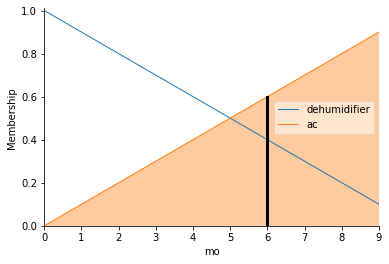

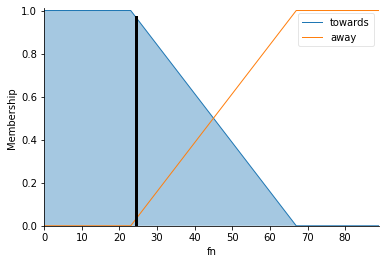

In [14]:
print (ac.output)
sc.view(sim=ac)
sf.view(sim=ac)
mo.view(sim=ac)
fn.view(sim=ac)